In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_data import get_weather_data
from edo_model_yang import sup_cap_yang, system_odes, solve_model,get_temp, plot_fit

Neste notebook, por meio de simulação numérica, utilizando dados sintéticos foi realida uma comparação da saída do modelo nas seguintes situações: 
- parâmetros ontomológicos fixos;
- parâmetros ontomológicos variando de acordo com a temperatura seguindo Yang; 
- adição da capacidade suporte variando no tempo seguindo a formulação do Yang 2016. 

Modelo com os parâmetros fixos:

In [2]:
t = np.arange(0, 175)


N = 256088

y0 = [10**4, 2*N, 0, 0, N, 0, 20, 0]


#start_date = '2010-01-02'
b = 0.5
beta = 0.75
D = 4
cap_t = 1

# parâmetros fixos 
MU_H = 1/(365*76)    #human mortality rate - day^-1
ALPHA_H = 0.1      #recovering rate - day^-1
THETA_H = 0.027   #intrinsic incubation rate - day^-1
K = 0.5          #fraction of female mosquitoes hatched from all egs
C_A = 0.0      #control effort rate on aquatic phase
C_M = 0.0    #control effort rate on terretrial phase



par_fit = b, beta

par_fixed = MU_H, THETA_H, ALPHA_H, K, C_A, C_M, D

r_fix = solve_model(t, y0, par_fit, par_fixed, None, cap_t, fixed = True)

Modelo com os parâmetros variáveis (Temperatura): 

In [3]:
T1 = get_temp(start_date = '2010-01-08', end_date = '2010-07-01')
T2 = get_temp(start_date = '2016-07-08', end_date = '2017-01-01')


r_c_t_1  = solve_model(t, y0, par_fit, par_fixed, T1, cap_t, fixed = False)

r_c_t_2  =  solve_model(t, y0, par_fit, par_fixed, T2, cap_t, fixed = False)

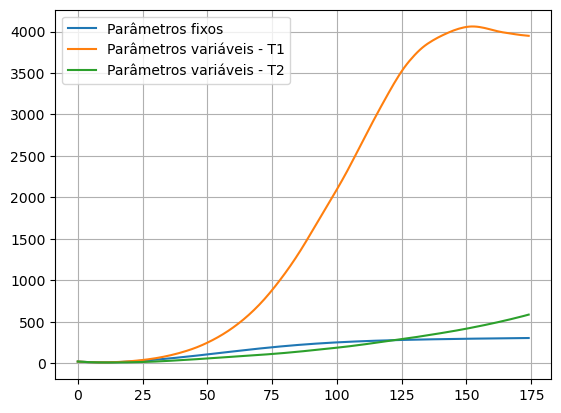

In [4]:
fig,ax = plt.subplots()

ax.plot(r_fix.y[6], label = 'Parâmetros fixos')
ax.plot(r_c_t_1.y[6], label = 'Parâmetros variáveis - T1')
ax.plot(r_c_t_2.y[6], label = 'Parâmetros variáveis - T2')

ax.grid()
ax.legend()
plt.show()

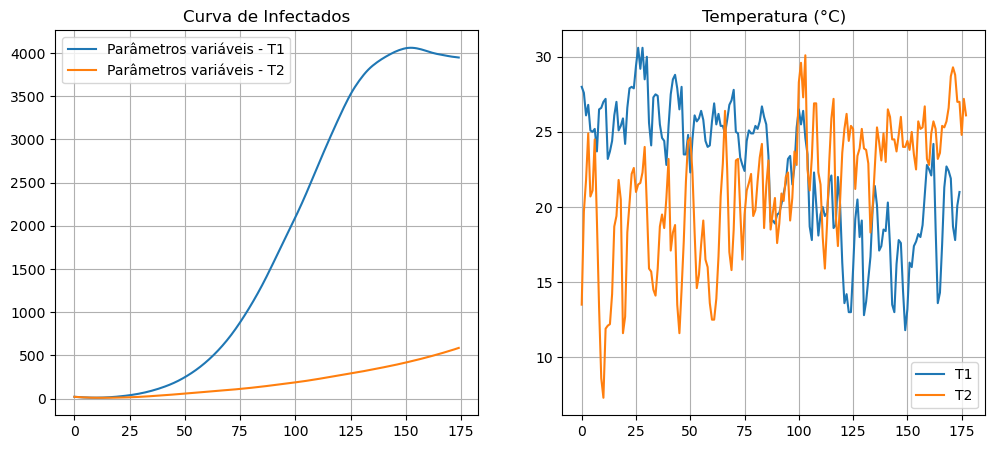

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

ax[0].plot(r_c_t_1.y[6], label = 'Parâmetros variáveis - T1')
ax[0].plot(r_c_t_2.y[6], label = 'Parâmetros variáveis - T2')

ax[0].grid()
ax[0].legend()
ax[0].set_title('Curva de Infectados')

ax[1].plot(T1, label = 'T1')
ax[1].plot(T2, label = 'T2')

ax[1].grid()
ax[1].legend()
ax[1].set_title('Temperatura (°C)') 
plt.show()

Introduzindo uma capacidade suporte variável: 

**Lembre-se que a capacidade suporte seguindo a fórmula do yang é calculada utilizando anos anteriores, sendo assim, perdemos os k primeiros valores.** 

In [6]:
df_we = get_weather_data()

C_1 =  sup_cap_yang(df_we.loc[(df_we.index >= '2010-01-01') & (df_we.index <= '2010-07-01')])
C_2 = sup_cap_yang(df_we.loc[(df_we.index >= '2016-07-01') & (df_we.index <= '2017-01-01')])


r_c_t_1_cap_1  =  solve_model(t, y0, par_fit, par_fixed, T1, C_1, fixed = False)

r_c_t_2_cap_2  =  solve_model(t, y0, par_fit, par_fixed, T2, C_2, fixed = False) 

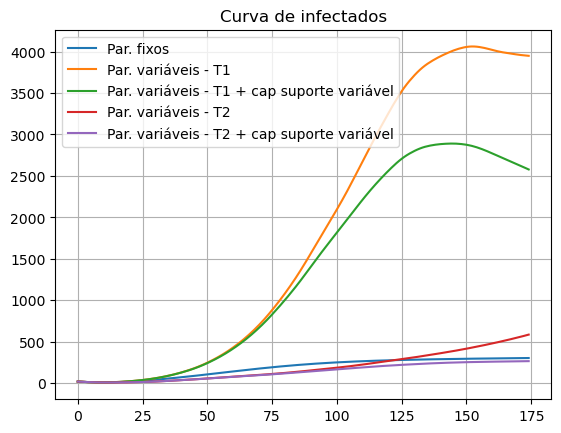

In [7]:
fig,ax = plt.subplots()

ax.plot(r_fix.y[6], label = 'Par. fixos')
ax.plot(r_c_t_1.y[6], label = 'Par. variáveis - T1')
ax.plot(r_c_t_1_cap_1.y[6], label = 'Par. variáveis - T1 + cap suporte variável')
ax.plot(r_c_t_2.y[6], label = 'Par. variáveis - T2')
ax.plot(r_c_t_2_cap_2.y[6], label = 'Par. variáveis - T2 + cap suporte variável')

ax.grid()
ax.legend()
ax.set_title('Curva de infectados')
plt.show()

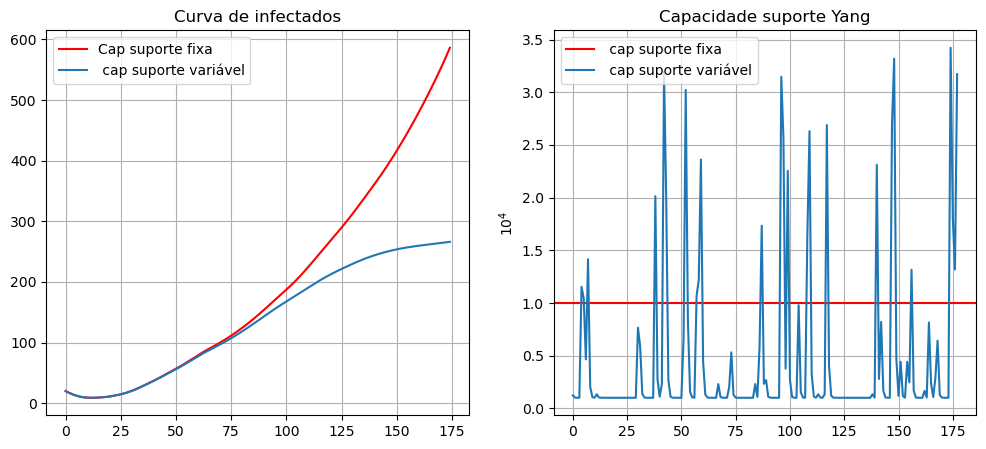

In [8]:
fig,ax = plt.subplots(1, 2, figsize = (12,5))

ax[0].plot(r_c_t_2.y[6], label = 'Cap suporte fixa', color = 'red')
ax[0].plot(r_c_t_2_cap_2.y[6], label = ' cap suporte variável', color = 'tab:blue')

ax[0].grid()
ax[0].legend()
ax[0].set_title('Curva de infectados')

ax[1].axhline(cap_t, label = ' cap suporte fixa', color = 'red')

ax[1].plot(C_2.values, label = ' cap suporte variável', color = 'tab:blue')

ax[1].grid()
ax[1].legend(loc=2)
ax[1].set_ylabel('$10^4$')
ax[1].set_title('Capacidade suporte Yang')

plt.show()